/tmp/ipython-input-1-2931444935.py:25: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2022-01-01', end='2024-12-31')
[*********************100%***********************]  1 of 1 completed


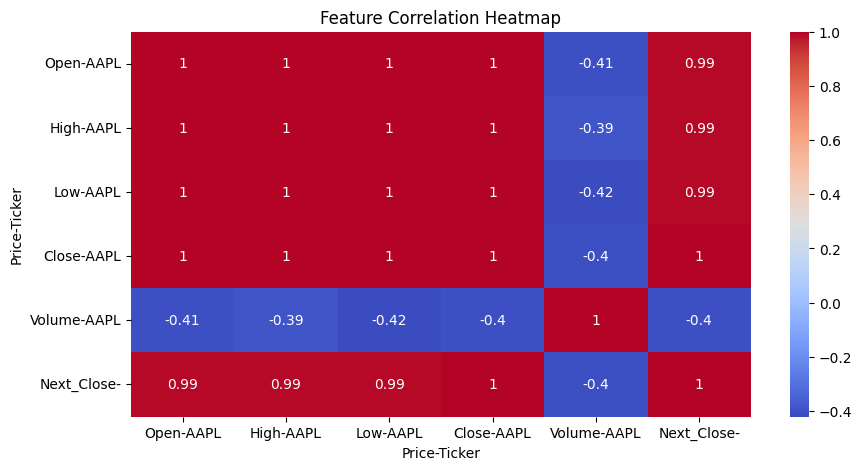

Linear Regression:
R² Score: 0.9291534970219169
RMSE: 3.767610336655872

 Random Forest:
R² Score: -4.418042584141674
RMSE: 32.94791809885012


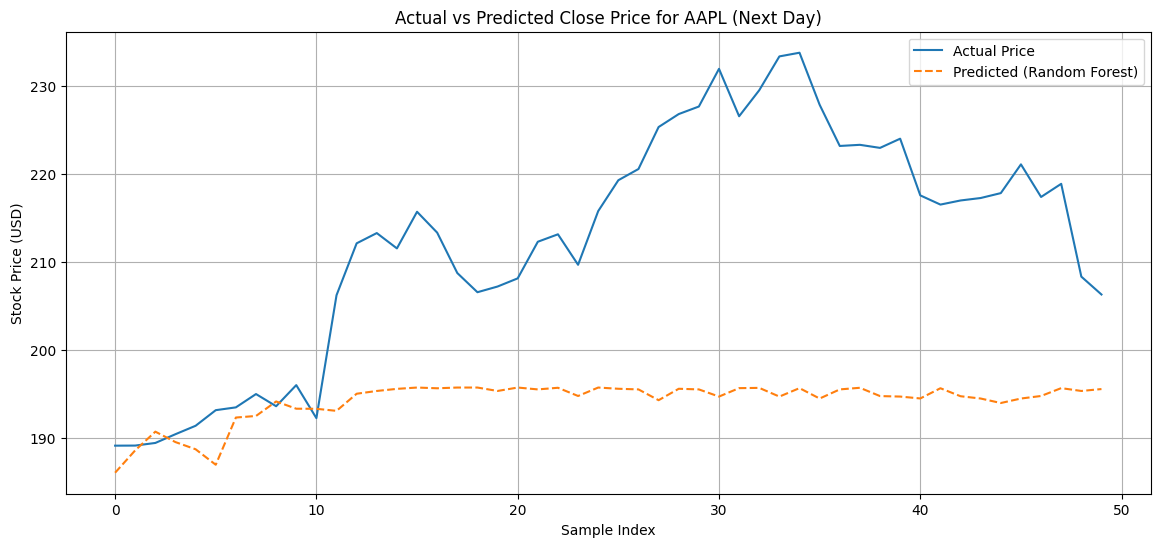

In [1]:
# ===============================
# Step 1: Install Required Libraries
# ===============================
!pip install yfinance --quiet

# ===============================
# Step 2: Import Libraries
# ===============================
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# ===============================
# Step 3: Download Stock Data
# ===============================
# You can change the ticker to 'TSLA', 'MSFT', etc.
ticker = 'AAPL'
data = yf.download(ticker, start='2022-01-01', end='2024-12-31')
data.reset_index(inplace=True)

# ===============================
# Step 4: Data Preprocessing
# ===============================
# Keep only required columns
df = data[['Open', 'High', 'Low', 'Close', 'Volume']]
df['Next_Close'] = df['Close'].shift(-1)  # Next day's Close
df.dropna(inplace=True)  # Remove last row with NaN in Next_Close

# ===============================
# Step 5: Exploratory Data Analysis (Optional but Recommended)
# ===============================
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# ===============================
# Step 6: Model Training
# ===============================
# Features and Target
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Next_Close']

# Split into training and testing (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

# Train models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# ===============================
# Step 7: Predictions
# ===============================
y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# ===============================
# Step 8: Model Evaluation
# ===============================
print("Linear Regression:")
print("R² Score:", r2_score(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

print("\n Random Forest:")
print("R² Score:", r2_score(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))

# ===============================
# Step 9: Visualize Predictions
# ===============================
plt.figure(figsize=(14,6))
plt.plot(y_test.values[:50], label='Actual Price')
plt.plot(y_pred_rf[:50], label='Predicted (Random Forest)', linestyle='--')
plt.title(f'Actual vs Predicted Close Price for {ticker} (Next Day)')
plt.xlabel('Sample Index')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.grid(True)
plt.show()
